In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
df=pd.read_csv(r"D:\dataset.csv")
df.head(4)

,Square_Feet,Bedrooms,Price
0,1500,3,300000
1,1800,4,400000
2,2400,3,500000
3,3000,5,600000


In [3]:
df.isnull().sum()

Square_Feet    0
Bedrooms       0
Price          0
dtype: int64

In [4]:
square_feet_stats=df['Square_Feet'].describe()
bedrooms_stats=df["Bedrooms"].describe()

print("Square_Feet_Stats : ",square_feet_stats)
print("Bedrooms Stats:" , bedrooms_stats)

Square_Feet_Stats :  count       9.000000
mean     2388.888889
std       795.996929
min      1200.000000
25%      1800.000000
50%      2400.000000
75%      3000.000000
max      3500.000000
Name: Square_Feet, dtype: float64
Bedrooms Stats: count    9.000000
mean     3.555556
std      0.881917
min      2.000000
25%      3.000000
50%      4.000000
75%      4.000000
max      5.000000
Name: Bedrooms, dtype: float64


In [37]:
df['price_category'] = (df['Price'] >= 500000).astype(int)

x=df[["Square_Feet","Bedrooms"]]
y=df["price_category"]
y

0    0
1    0
2    1
3    1
4    1
5    0
6    0
7    1
8    1
Name: price_category, dtype: int64

In [38]:
# le=LabelEncoder()
# y_encoded=le.fit_transform(y)

In [39]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [66]:
y_pred=rf_model.predict(x_test)

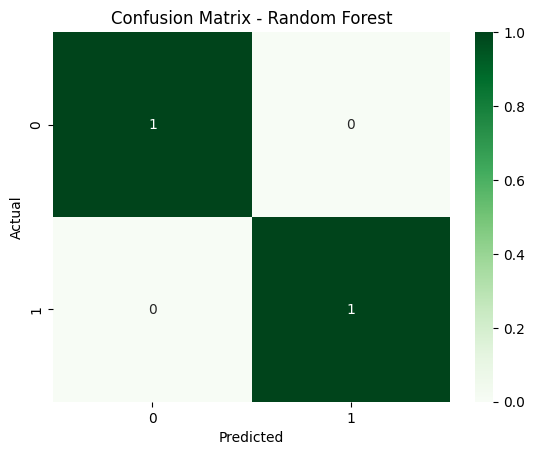

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [67]:


# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Classification Report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [68]:
cv_scores = cross_val_score(rf_model,x, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


C:\Users\Priti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation accuracy scores: [0.5 1.  1.  1.  1. ]
Mean accuracy: 0.9
Standard deviation: 0.20000000000000004


In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=7)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
kn.score(x_train,y_train)*100 , kn.score(x_test,y_test)*100

(42.857142857142854, 0.0)

In [71]:
from sklearn.svm import SVC

In [75]:
sv_model=SVC(kernel="linear")
sv_model.fit(x_train,y_train)

SVC(kernel='linear')

In [83]:
sv_model.score(x_train,y_train)*100  , sv_model.score(x_test,y_test)*100

(100.0, 100.0)

In [84]:
y_pred=sv_model.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix - SV')

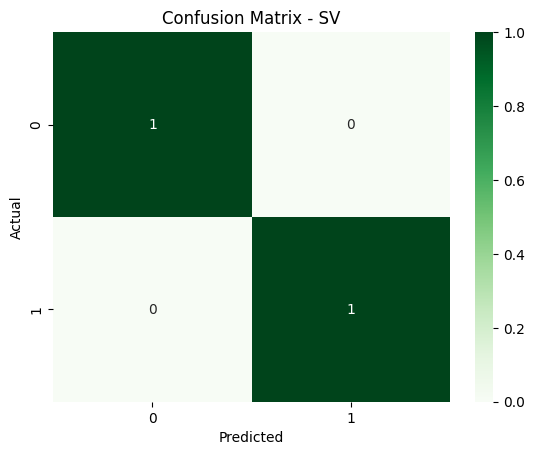

In [89]:
cm_sv=confusion_matrix(y_test,y_pred)
sns.heatmap(cm_sv, annot=True, cmap="Greens", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SV")


In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [91]:
cv_scores = cross_val_score(sv_model,x, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


Cross-validation accuracy scores: [0.5 1.  1.  0.5 1. ]
Mean accuracy: 0.8
Standard deviation: 0.2449489742783178


C:\Users\Priti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
